<a href="https://colab.research.google.com/github/pawan123-k/my-project/blob/main/Kommu_Venkata_Pawan_12005637.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Importing necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt

In [ ]:
# Step 1: Read Dataset from UCI machine learning repository
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/parkinsons/parkinsons.data"
df = pd.read_csv(url)

In [ ]:
df.isnull().sum()

name                0
MDVP:Fo(Hz)         0
MDVP:Fhi(Hz)        0
MDVP:Flo(Hz)        0
MDVP:Jitter(%)      0
MDVP:Jitter(Abs)    0
MDVP:RAP            0
MDVP:PPQ            0
Jitter:DDP          0
MDVP:Shimmer        0
MDVP:Shimmer(dB)    0
Shimmer:APQ3        0
Shimmer:APQ5        0
MDVP:APQ            0
Shimmer:DDA         0
NHR                 0
HNR                 0
status              0
RPDE                0
DFA                 0
spread1             0
spread2             0
D2                  0
PPE                 0
dtype: int64

In [ ]:
df.head()

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


In [ ]:
# Step 2: Apply Data Preprocessing
X = df.drop(['name', 'status'], axis=1)
y = df['status']

In [ ]:
# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
# Standardizing the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
# Step 3: Apply minimum 3 classification models
models = [('SVC', SVC()), ('KNN', KNeighborsClassifier()), ('RF', RandomForestClassifier())]
results = []
names = []
for name, model in models:
    clf = Pipeline(steps=[('model', model)])
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    results.append(accuracy)
    names.append(name)
    print(f'{name}: {accuracy}')

SVC: 0.8813559322033898
KNN: 0.8983050847457628
RF: 0.9322033898305084


In [ ]:
# Step 4: Apply Hyperparameter Tuning
parameters = [
    {
        'model': [SVC()],
        'model__kernel': ['linear', 'rbf', 'sigmoid'],
        'model__C': [0.1, 1, 10, 100]
    },
    {
        'model': [KNeighborsClassifier()],
        'model__n_neighbors': [3, 5, 7, 9],
        'model__weights': ['uniform', 'distance']
    },
    {
        'model': [RandomForestClassifier()],
        'model__n_estimators': [50, 100, 150],
        'model__max_depth': [5, 10, 15],
        'model__min_samples_split': [2, 5, 10],
        'model__min_samples_leaf': [1, 2, 4]
    }
]

In [ ]:
for i in range(len(models)):
    clf = Pipeline(steps=[('model', models[i][1])])
    grid_search = GridSearchCV(clf, parameters[i], cv=5)
    grid_search.fit(X_train, y_train)
    y_pred = grid_search.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    results[i] = accuracy
    print(f'Best parameters for {models[i][0]}: {grid_search.best_params_}')
    print(f'{models[i][0]}: {accuracy}')

Best parameters for SVC: {'model': SVC(C=100), 'model__C': 100, 'model__kernel': 'rbf'}
SVC: 0.9322033898305084
Best parameters for KNN: {'model': KNeighborsClassifier(weights='distance'), 'model__n_neighbors': 5, 'model__weights': 'distance'}
KNN: 0.8983050847457628
Best parameters for RF: {'model': RandomForestClassifier(max_depth=15, min_samples_leaf=2, n_estimators=50), 'model__max_depth': 15, 'model__min_samples_leaf': 2, 'model__min_samples_split': 2, 'model__n_estimators': 50}
RF: 0.9322033898305084


In [ ]:
# Step 5: Compare the results
for i in range(len(models)):
    print(f'{names[i]}: {results[i]}')

SVC: 0.9322033898305084
KNN: 0.8983050847457628
RF: 0.9322033898305084


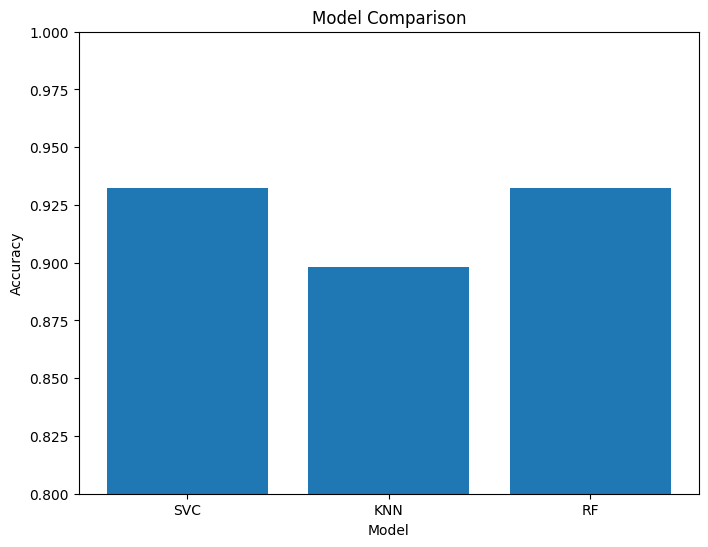

In [ ]:
# Step 5: Compare the results with graph
plt.figure(figsize=(8, 6))
plt.bar(names, results)
plt.title('Model Comparison')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.ylim([0.8, 1])
plt.show()